**Hand Written Digit Prediction - Classification Analysis**

The digits dataset consists of 8*8 pixel images of digits.The images attribute of the dataset stores 8*8 array of greyscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents

Import Library

In [ ]:
 import pandas as pn

In [ ]:
 import numpy as np

In [ ]:
 import matplotlib.pyplot as plt

Import Data

In [ ]:
 from sklearn.datasets import load_digits

In [ ]:
 df = load_digits()

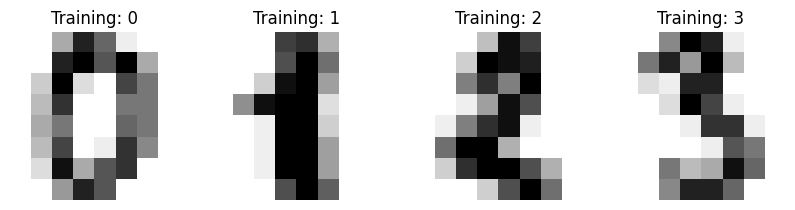

In [ ]:
 _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

Data Preprocessing

Flatten image

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

Scaling Image Data

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Train Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier()

Predict Test Data

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
y_pred

array([5, 4, 4, 3, 0, 2, 9, 1, 4, 8, 5, 6, 9, 1, 6, 2, 6, 8, 0, 1, 5, 2,
       4, 2, 2, 7, 6, 7, 8, 8, 5, 8, 2, 4, 6, 3, 8, 1, 6, 9, 0, 7, 7, 0,
       0, 5, 7, 3, 5, 6, 5, 8, 1, 3, 7, 2, 1, 5, 5, 4, 6, 6, 4, 1, 5, 5,
       1, 1, 7, 9, 0, 9, 2, 2, 4, 5, 2, 4, 4, 8, 3, 0, 7, 1, 9, 4, 9, 8,
       5, 9, 5, 5, 5, 3, 3, 6, 2, 5, 1, 7, 9, 9, 8, 6, 4, 2, 1, 6, 9, 2,
       4, 2, 7, 2, 6, 5, 7, 3, 1, 6, 8, 7, 8, 4, 2, 3, 1, 3, 3, 1, 8, 5,
       9, 1, 6, 4, 6, 0, 5, 8, 6, 8, 7, 4, 4, 0, 1, 8, 1, 9, 2, 0, 1, 1,
       4, 9, 1, 5, 6, 9, 0, 9, 1, 7, 4, 2, 0, 6, 0, 6, 9, 8, 6, 7, 3, 3,
       2, 9, 7, 5, 1, 3, 5, 3, 7, 0, 0, 4, 2, 3, 9, 8, 4, 3, 8, 8, 2, 5,
       7, 7, 1, 4, 6, 4, 2, 1, 0, 8, 4, 7, 2, 1, 7, 8, 1, 2, 4, 2, 3, 9,
       2, 1, 5, 4, 9, 4, 2, 8, 5, 3, 2, 7, 1, 5, 7, 8, 1, 9, 3, 7, 9, 4,
       1, 2, 0, 3, 9, 1, 7, 7, 7, 4, 1, 3, 0, 3, 4, 2, 2, 1, 0, 3, 1, 3,
       5, 4, 9, 7, 3, 5, 0, 7, 9, 4, 6, 6, 1, 0, 7, 2, 5, 6, 7, 9, 7, 4,
       6, 3, 9, 1, 5, 3, 8, 6, 2, 0, 3, 5, 7, 9, 2,

Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[51,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0, 58,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  0, 51,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 52,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 60]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.96      0.98      0.97        54
           2       1.00      0.98      0.99        59
           3       0.98      0.94      0.96        53
           4       0.94      0.98      0.96        52
           5       0.93      0.95      0.94        55
           6       0.98      0.98      0.98        55
           7       0.94      1.00      0.97        50
           8       1.00      0.93      0.97        46
           9       0.95      0.95      0.95        63

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

